In [2]:
function f(x)
    return x^2
end

f (generic function with 1 method)

In [3]:
function Flatt(N)
    F=0
    for ix=0:N-1
        x=ix/N
        xp1=(ix+1)/N
        F+=(f(x)+f(xp1))/2
    end
    F/=N
    return F
end

Flatt (generic function with 1 method)

In [4]:
function Fmc(N)
    F=0
    for ix=1:N
        x=rand()
        F+=f(x)
    end
    F/=N
    return F
end

Fmc (generic function with 1 method)

In [5]:
using Plots

In [17]:
Ns=[N for N in 1:1000]

1000-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
    ⋮
  992
  993
  994
  995
  996
  997
  998
  999
 1000

In [18]:
deltalatt = [(Flatt(N)-1/3)/(1/3) for N in Ns]

1000-element Vector{Float64}:
 0.5000000000000001
 0.12500000000000006
 0.055555555555555636
 0.031250000000000056
 0.02000000000000013
 0.01388888888888895
 0.010204081632652906
 0.007812500000000056
 0.006172839506172978
 0.004999999999999949
 ⋮
 5.08097033780075e-7
 5.070741923018929e-7
 5.060544353563401e-7
 5.050377517856752e-7
 5.040241271014878e-7
 5.030135548089731e-7
 5.02006015756784e-7
 5.010015021178482e-7
 5.000000002364224e-7

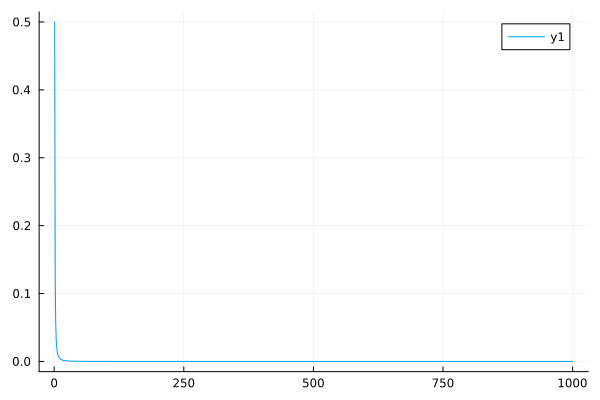

In [19]:
plot(Ns,deltalatt)

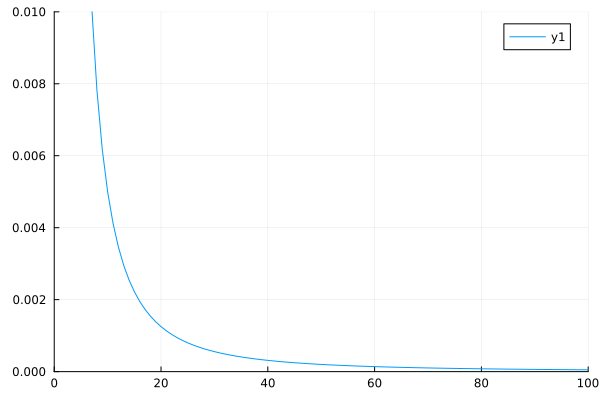

In [20]:
plot(Ns,deltalatt,xlim=(0,100),ylim=(0,0.01))

In [10]:
Ns=[N for N in 100:1000]
deltamc=[(Fmc(N)-1/3)/(1/3) for N in Ns]

901-element Vector{Float64}:
  0.059661988163506985
 -0.021166418853522773
 -0.07019655944310271
 -0.03939285441840373
 -0.04765827619512181
 -0.09370534924484275
  0.020246952789172934
  0.02530785764014476
 -0.01640977898517132
  0.05142285503926347
  ⋮
  0.016298870772217255
 -0.03181440196447466
 -0.04897596304829421
 -0.0030839626723805913
  0.007377413221090978
 -0.03838577918338415
 -0.004035482877700114
  0.019493779154943436
  0.05128810236706899

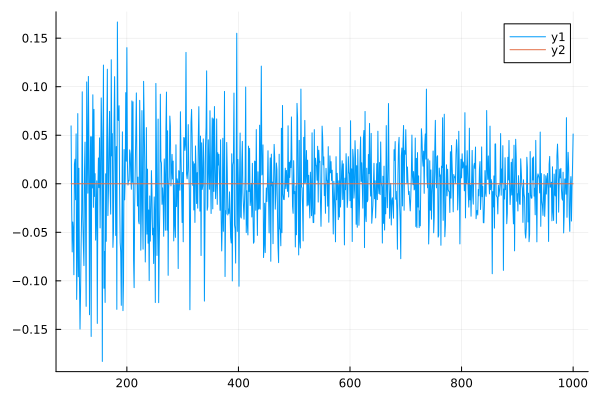

In [11]:
plot(Ns,deltamc)
plot!(Ns,deltalatt)

In [12]:
function sigma(N,M)
    F2=0
    F1=0
    for iM=1:M
        F=Fmc(N)
        F2+=F^2
        F1+=F
    end
    F2/=M
    F1/=M
    return sqrt(F2-F1^2)
end

sigma (generic function with 1 method)

In [13]:
println(sigma(100,100000))

0.02982593763797001


In [14]:
Nmcs = [i for i in 1:1000]
sigmas = [sigma(i,10000) for i in Nmcs]

1000-element Vector{Float64}:
 0.29686945077241866
 0.21022340741374648
 0.1717626851881905
 0.15056743107229165
 0.13410157654992177
 0.12261675671937798
 0.11400776933422532
 0.1050918953155242
 0.09898133707204075
 0.09588439334204898
 ⋮
 0.00946075694331002
 0.009380311711993801
 0.009472392479041272
 0.009387746689880686
 0.009383521230719116
 0.00942348747656641
 0.009578887837172114
 0.00939902878524376
 0.009353703075380668

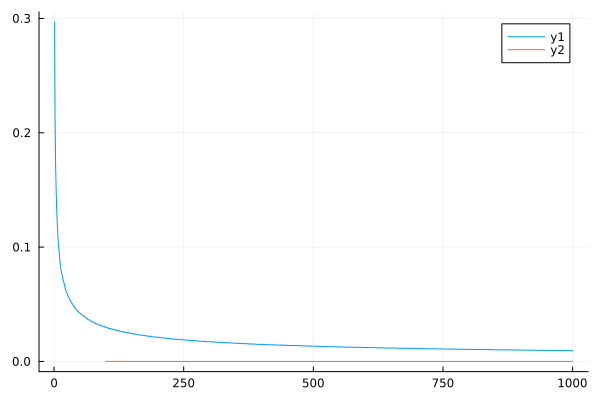

In [15]:
plot(Nmcs,sigmas)
plot!(Ns,deltalatt)